In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import *
from collections import Counter
%matplotlib inline

from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

## Построение доверительных интервалов для среднего

### Тренировочный тест №1

In [2]:
data = pd.read_csv('static/water.txt', sep='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
data.mortality.mean() - 1.96*data.mortality.std()/sqrt(len(data))

1477.0516384236214

In [4]:
_tconfint_generic(data.mortality.mean(), data.mortality.std()/sqrt(len(data)), 60, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

In [5]:
datat = data[data['location']=="South"]
datan = data[data['location']=="North"]
print("South mortality %s" % [round(x,4) for x in 
 _tconfint_generic(datat.mortality.mean(), datat.mortality.std()/sqrt(len(datat)), len(datat)-1, 0.05, 'two-sided')])
print("North mortality %s" % [round(x,4) for x in 
 _tconfint_generic(datan.mortality.mean(), datan.mortality.std()/sqrt(len(datan)), len(datan)-1, 0.05, 'two-sided')])
print("South hardness %s" % [round(x,4) for x in 
 _tconfint_generic(datat.hardness.mean(), datat.hardness.std()/sqrt(len(datat)), len(datat)-1, 0.05, 'two-sided')])
print("North hardness %s" % [round(x,4) for x in 
 _tconfint_generic(datan.hardness.mean(), datan.hardness.std()/sqrt(len(datan)), len(datan)-1, 0.05, 'two-sided')])

South mortality [1320.1517, 1433.4636]
North mortality [1586.5605, 1680.6395]
South hardness [53.4672, 86.0713]
North hardness [21.4225, 39.3775]


## Построение доверительных интервалов для доли

#### Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница?

In [6]:
1/50, 1/50-stats.norm.ppf(1-0.05/2)*sqrt((1/50)*(1-1/50)/50)

(0.02, -0.018805307081790974)

In [7]:
_tconfint_generic(1/50, sqrt((1/50)*(1-1/50)/50), 50, 0.05, 'two-sided')

(-0.019767441473021823, 0.05976744147302182)

In [4]:
proportion_confint(1,50, method='normal'), proportion_confint(1,50, method='wilson')

((0.0, 0.05880530708179099), (0.003539259271646236, 0.10495443589637815))

In [10]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [11]:
my_proportion_confint(1,50)

(-0.018805307081790987, 0.05880530708179099)

#### Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%?

In [23]:
samplesize_confint_proportion(1/50, 0.01)

752.9259288560489

In [21]:
samplesize_confint_proportion(0.5, 0.01)

9603.647051735317

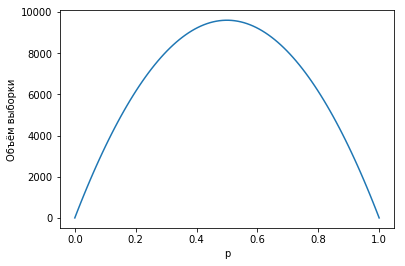

In [22]:
x = np.linspace(0,1,100)
y = samplesize_confint_proportion(x, 0.01)
plt.plot(x, y)
plt.xlabel('p')
plt.ylabel('Объём выборки')
plt.show()

## Доверительные интервалы. Тест

In [ ]:
99.7% вероятностной массы случайной величины лежит в интервале. Чему равно точное значение константы c

In [17]:
stats.norm.ppf(0.003/2)

-2.9677379253417833

In [25]:
104/11037-189/11034, proportion_confint(104, 11037, method='wilson'), proportion_confint(189, 11034, method='wilson')

(-0.0077060239760047815,
 (0.007783358288966079, 0.011403717226138864),
 (0.014870523663224692, 0.01972332878929014))

In [61]:
def proportions_confint_diff_ind(p1, n1, p2, n2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

print ("confidence interval: [%f, %f]" % proportions_confint_diff_ind(104/11037, 11037, 189/11034, 11034))

confidence interval: [-0.010724, -0.004688]


In [62]:
189/(11034-189)/(104/(11037-104))

1.8320539419087138

## Практика проверки гипотез. Тест 

In [9]:
stats.binom_test(22, 50, 0.75, alternative='less')

2.9168262414030864e-06

### Сосны в The Wage Tract 

In [2]:
data = pd.read_csv('static/pines.txt', sep='\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [13]:
data.shape

(584, 2)

In [47]:
a = stats.binned_statistic_2d(data.sn, data.we, values=None, bins=5, statistic='count')
a.statistic.flatten()

C:\Users\creed\Anaconda3\lib\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [45]:
# Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? 
584/25

23.36

In [54]:
exp = [23.36]*25

In [64]:
stats.chisquare(a.statistic.flatten(), exp)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

## Критерии Стьюдента. Тест

In [2]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [28]:
_zconfint_generic(9.57, 0.4/sqrt(160), alpha=0.02685, alternative='two-sided')

(9.499996924528764, 9.640003075471236)

### Бриллианты

In [32]:
data = pd.read_csv('static/diamonds.txt', sep='\t')

In [33]:
data.shape

(53940, 7)

In [41]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [54]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ carat + depth + table + x ', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 8.228e+04
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:34:11   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53935   BIC:                         9.419e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.077e+04    418.984     49.562      0.000    1.99e+04    2.16e+04
carat       1.069e+04     63.168    169.271      0.000    1.06e+04    1.08e+04
depth       -201.2311      4.852    -41.478      0.000    -210.740    -191.722
table       -102.8239      3.082    -33.367      0.000    -108.864     -96.784
x          -1226.7732     26.678    -45.984      0.000   -1279.062   -1174.484
==============================================================================
Omnibus:                    14095.099   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374077.314
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.831   Cond. No.                     5.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""